# anti_party_FAC
* 因素分析 -> 根據構面取平均
* 因素分析 -> 根據構面取綜合得分
* 因素分析 -> 全部算一個綜合得分

## Import package

In [15]:
# ! pip install factor_analyzer pingouin stargazer plotnine geopandas folium Factor_Analysis

In [1]:
# for data ETL
import pandas as pd
import ETL
# Module for spatial data manipulation
import geopandas as gpd
# Module for data viz 
from plotnine import *
import plotnine
import plotly.express as px
import seaborn as sns               
import matplotlib.pyplot as plt
# Module for spatial data viz
import folium
import branca
import branca.colormap as cm
from folium.features import GeoJson, GeoJsonTooltip
# for establish index
import Factor_Analysis 
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import pingouin as pg # index reliability testing
# for stats ml
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.miscmodels.ordinal_model import OrderedModel
from stargazer.stargazer import Stargazer

## Load data and filiter 

In [2]:
raw_data = pd.read_csv('raw_data.csv')

In [3]:
filter_data = raw_data.loc[raw_data['目前國內政黨當中，請問您是否偏向哪一個政黨？'].isin(['沒有特定支持', '都不支持'])]
filter_data.drop(['您有絶對的權力決定是否要參與本研究。若您願意參與，請務必勾選下列選項：', '請填寫您的電子信箱，以利後續抽獎聯繫使用'], axis=1, inplace=True)

/var/folders/dn/wbyhv8k14697mm1zy19w1jh40000gn/T/ipykernel_82029/2097987034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Data Cleaning

In [4]:
ml_df = ETL.data_cleaning(filter_data)
ml_df = ml_df.reset_index(drop=True)

/Users/wen/Desktop/github/media_political/ETL.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/wen/Desktop/github/media_political/ETL.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/wen/Desktop/github/media_political/ETL.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [5]:
ml_df.shape

(503, 33)

In [6]:
ml_df = ETL.anti_party_feature(ml_df)
ml_df.shape

(503, 38)

In [7]:
ml_df

,TV_news_time,news_paper_time,int_news_time,TV_debate,read_media,like_media,share_media,comment_media,int_discuss,read_election_news,...,anti_5,TC_issue,Negative_1,Negative_2,Negative_3,political_polarization_mean,party_image_mean,political_polarization_score,party_image_score,anti_party_scores
0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,...,4,2,轉而支持其他候選人,轉而支持其他候選人,轉而支持其他候選人,5.0,4.666667,1.147308,1.039196,1.103528
1,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,2.0,2.0,...,4,4,沒有影響,沒有影響,沒有影響,4.0,4.333333,0.921384,-0.109686,0.503846
2,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,...,2,4,沒有影響,轉而支持其他候選人,轉而支持其他候選人,5.0,3.000000,-0.794236,1.176296,0.003743
3,1.0,1.0,1.0,3.0,4.0,2.0,1.0,1.0,2.0,4.0,...,1,4,沒有影響,沒有影響,轉而支持其他候選人,4.0,1.666667,-1.430942,0.057541,-0.828172
4,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,3.0,2.0,...,5,2,轉而支持其他候選人,轉而支持其他候選人,沒有影響,2.0,4.666667,1.184414,-2.445558,-0.285565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,4.0,4.0,...,2,2,轉而支持其他候選人,沒有影響,沒有影響,5.0,2.000000,-1.279918,1.212005,-0.270798
499,2.0,1.0,3.0,2.0,3.0,3.0,1.0,1.0,2.0,3.0,...,5,2,沒有影響,沒有影響,沒有影響,4.0,4.666667,1.109744,-0.118667,0.612291
500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2,2,沒有影響,轉而支持其他候選人,可能因此不去投票,2.0,3.333333,0.300458,-2.384222,-0.786720
501,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2,3,轉而支持其他候選人,轉而支持其他候選人,轉而支持其他候選人,2.0,2.666667,-0.869466,-2.301473,-1.449366


## Factor Analysis

### Filter out IV

In [8]:
IV_vars = ['anti_1', 'anti_2', 'anti_3', 'anti_4', 'anti_5']
IV_df = ml_df[IV_vars]

### Bartlett’s test and Kaiser-Meyer-Olkin 

In [9]:
# Adequacy test - Bartlett's test
chiSquareValue, pValue = calculate_bartlett_sphericity(IV_df)
print('Chi-square value : {}'.format(round(chiSquareValue, ndigits = 3)))
print('p-value          : {}'.format(round(pValue, ndigits = 3)))

Chi-square value : 358.638
p-value          : 0.0


The Bartlett test produces a p-value that is less than 0.05. It means, we reject the null hypothesis or in this case, at least two population variances are different.

In [10]:
# Adequacy test - Kaiser-Meyer-Olkin test
KMO, KMO_model = calculate_kmo(IV_df)
print('KMO value : {}'.format(round(KMO_model, ndigits = 3)))

KMO value : 0.675


### Communality testing


In [11]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors = 25, rotation = None)
fa.fit(IV_df)
# The communalities
df_communalities_IV = pd.DataFrame(data = {'Column': IV_df.columns, 'Communality': fa.get_communalities()})
df_communalities_IV
df_communalities_IV.style.apply(Factor_Analysis.highlightCommunalities, subset = ['Communality'])

,Column,Communality
0,anti_1,0.221566
1,anti_2,0.293960
2,anti_3,0.505509
3,anti_4,0.681468
4,anti_5,0.366133


The yellow color indicates that the communality values meet the criteria — greater than 0.5. Eliminated Variable below 0.5 .

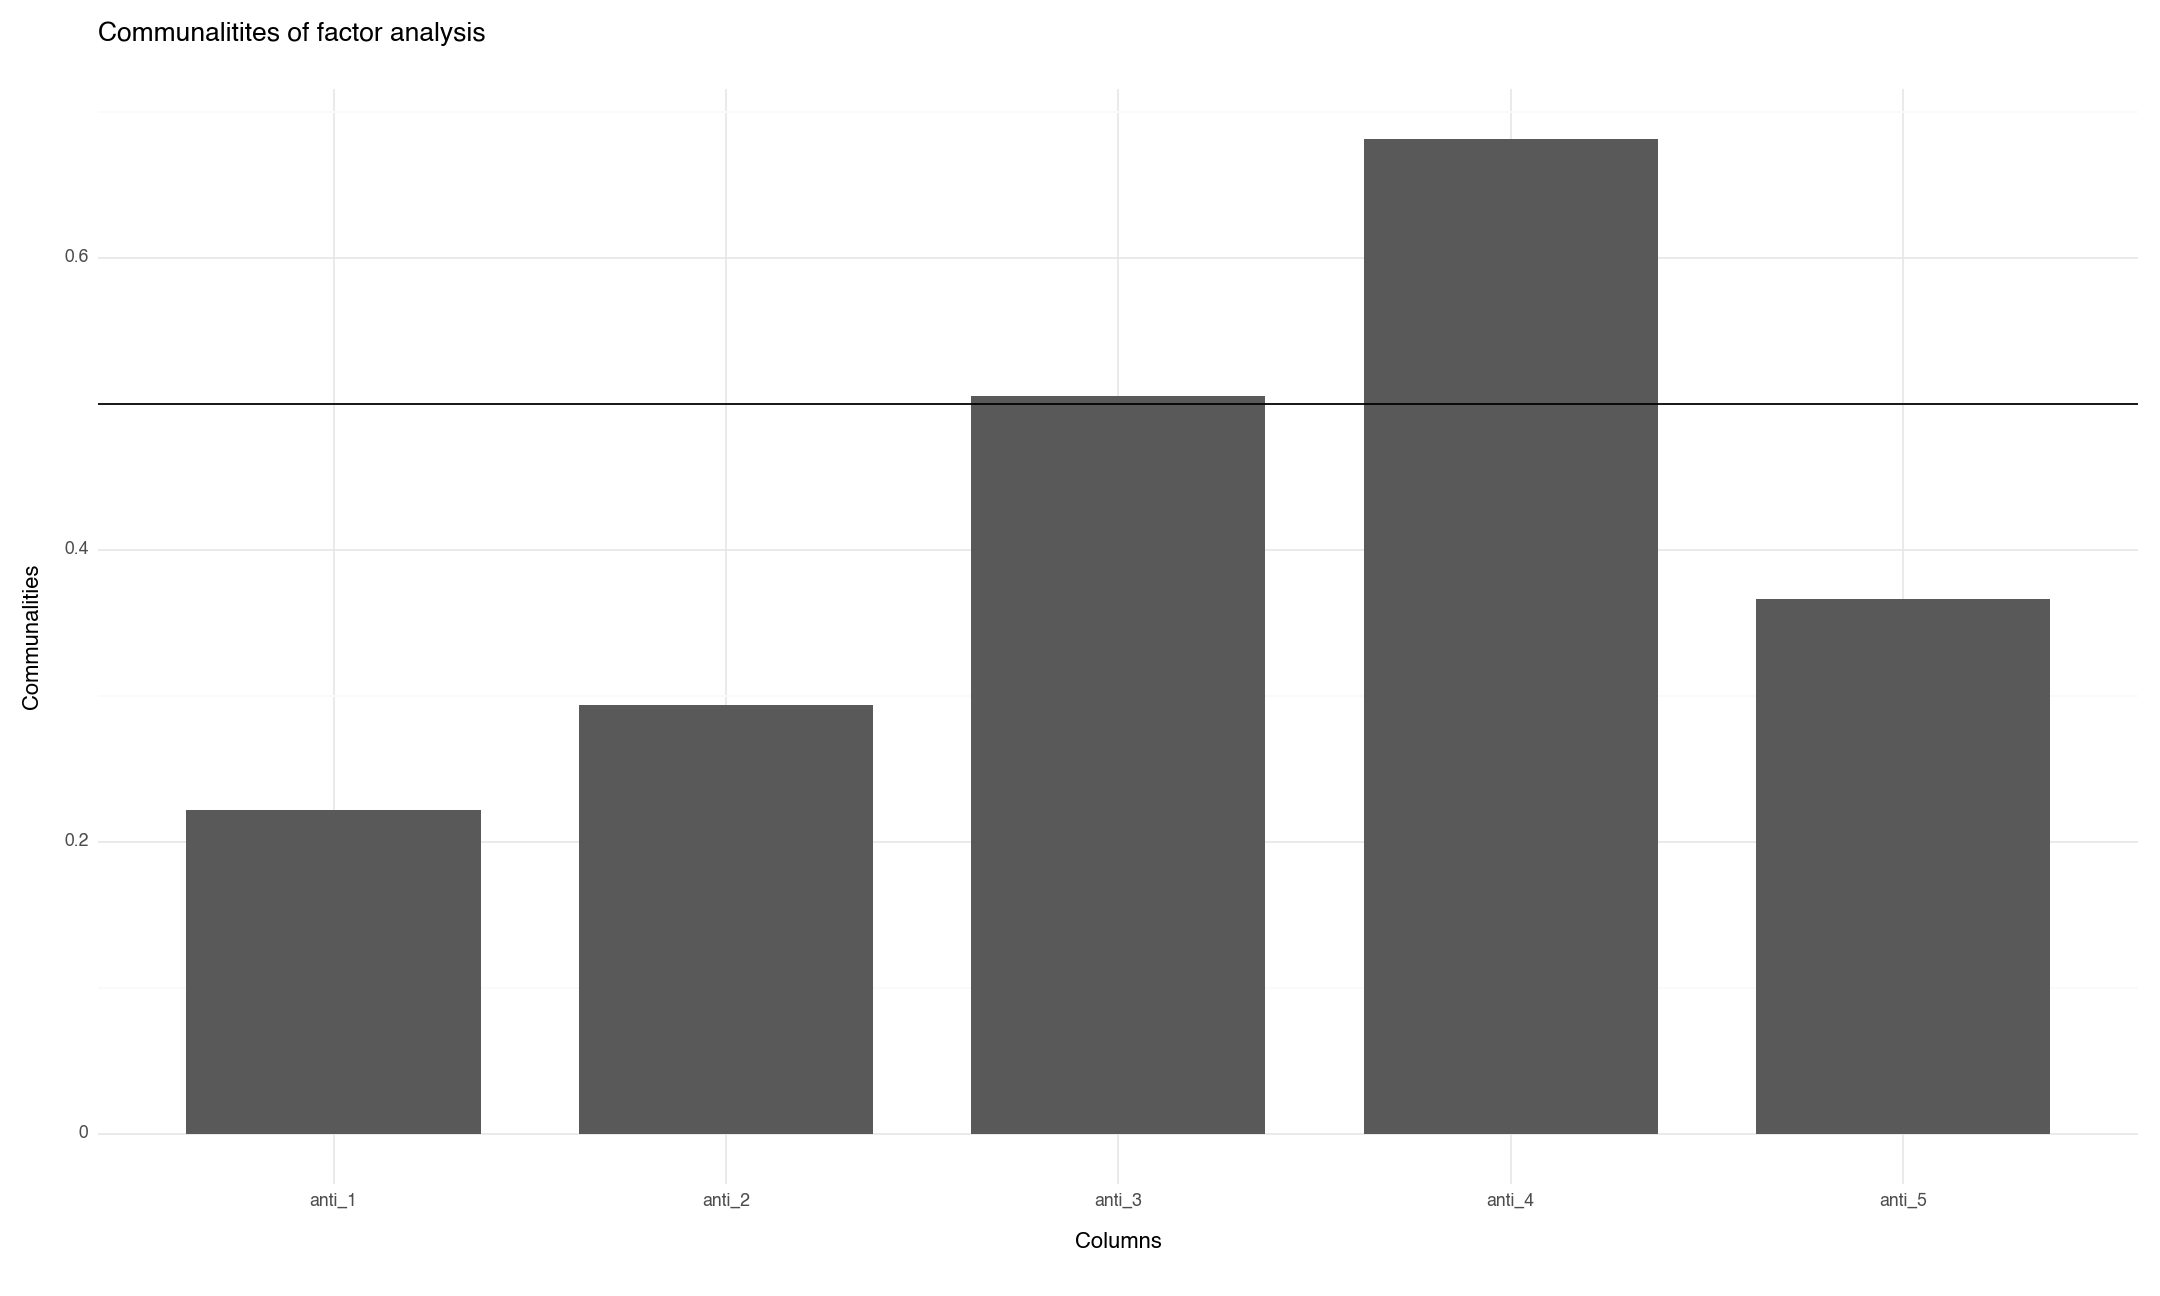

<Figure Size: (1080 x 648)>

In [12]:
# Data viz
plotnine.options.figure_size = (15, 9)
communality_bar = (
    ggplot(data = df_communalities_IV)+
    geom_bar(aes(x = 'Column',
                 y = 'Communality'),
             width = 0.75,
             stat = 'identity')+
    geom_hline(yintercept = 0.5)+
    scale_x_discrete(limits = df_communalities_IV['Column'].tolist())+
    labs(title = 'Communalitites of factor analysis')+
    xlab('Columns')+
    ylab('Communalities')+
    theme_minimal()
)
# Display the viz
communality_bar

### Reduce Factors

In [13]:
# Check Eigenvalues
eigenValue, value = fa.get_eigenvalues()

In [14]:
# Convert the results into a dataframe
df_eigen = pd.DataFrame({'Factor': range(1, len(eigenValue) + 1), 'Eigen value': eigenValue})
df_eigen.style.apply(Factor_Analysis.highlightEigenvalue, subset = ['Eigen value'])

,Factor,Eigen value
0,1,2.067361
1,2,1.054130
2,3,0.782101
3,4,0.668077
4,5,0.428330


According to the Kaiser criteria, the number of factors generated is 2. It means that the 16 columns or well-known variables will be grouped and interpreted into 2 factors.

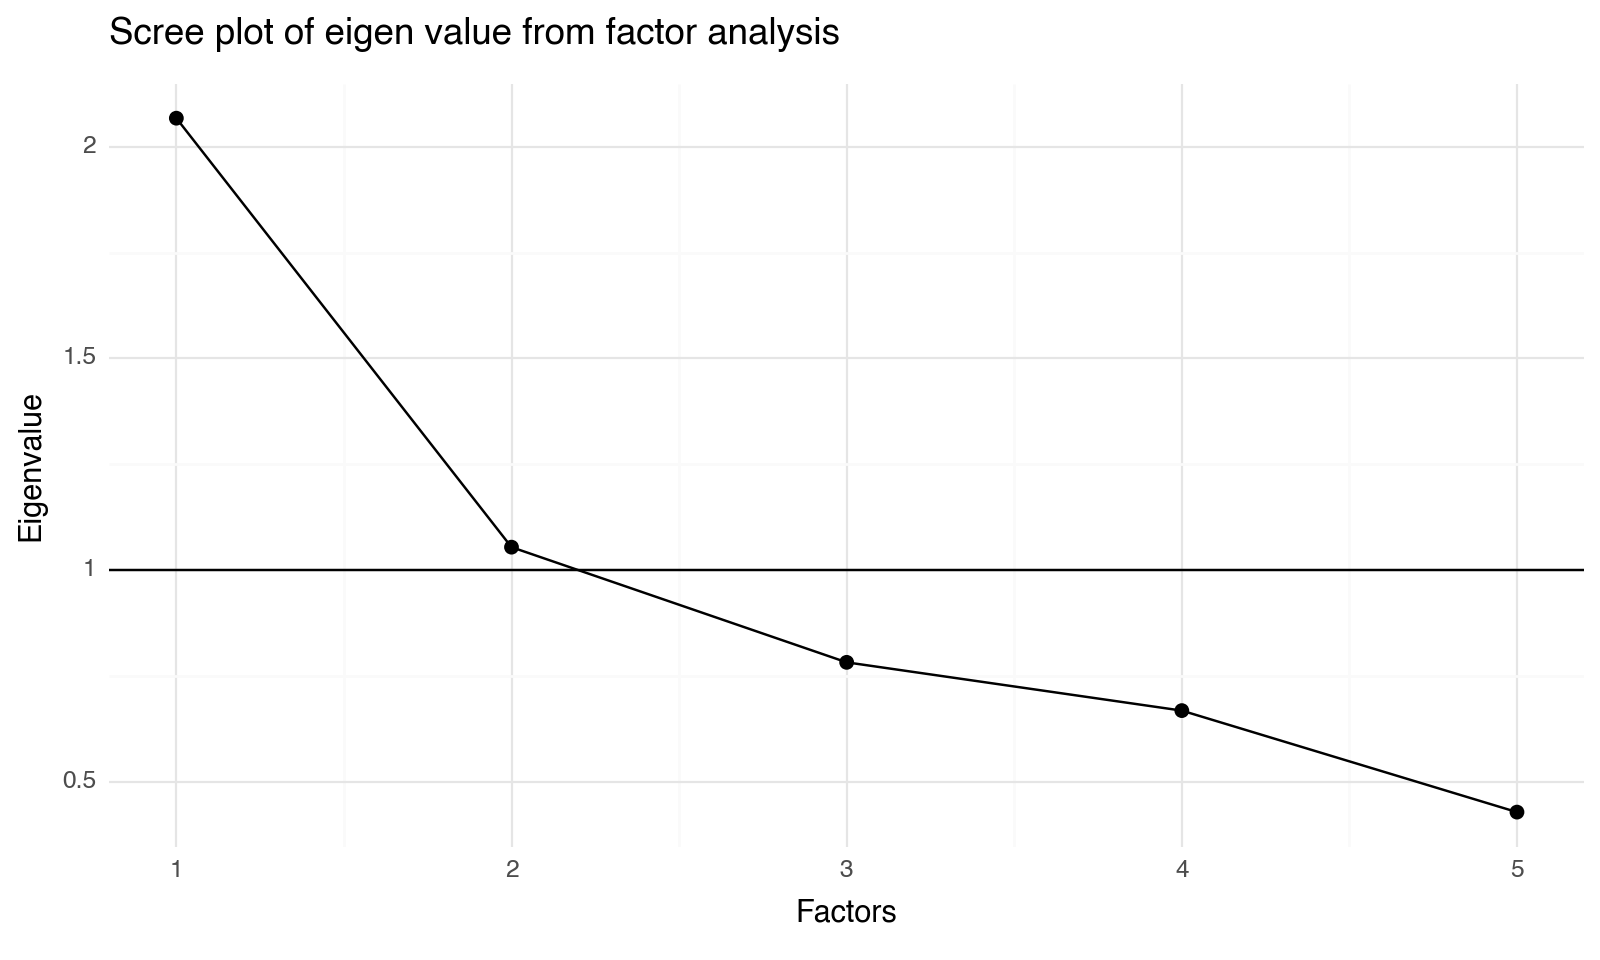

<Figure Size: (800 x 480)>

In [15]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
scree_eigenvalue = (
    ggplot(data = df_eigen)+
    geom_hline(yintercept = 1)+
    geom_line(aes(x = 'Factor',
                  y = 'Eigen value'))+
    geom_point(aes(x = 'Factor',
                   y = 'Eigen value'),
               size = 2)+
    labs(title = 'Scree plot of eigen value from factor analysis')+
    xlab('Factors')+
    ylab('Eigenvalue')+
    theme_minimal()
)
# Display the viz
scree_eigenvalue

In [16]:
# Factor analysis with rotation
fa = FactorAnalyzer(n_factors = 2, rotation = 'varimax')
fa.fit(IV_df)
# Create a factor's names
facs = ['Factors' + ' ' + str(i + 1) for i in range(2)]
print(facs)
# Loading factors
pd.DataFrame(data = fa.loadings_, index = IV_df.columns, columns = facs).style.apply(Factor_Analysis.highlightLoadings)

['Factors 1', 'Factors 2']


,Factors 1,Factors 2
anti_1,0.071513,0.988910
anti_2,0.313883,0.186564
anti_3,0.643948,0.021992
anti_4,0.851234,0.025711
anti_5,0.507072,0.083346


#### 由上述結果可以發現依變數可以分為2個構面：</b>

* 極化現象(political_polarization) : anti_1</b>


* 政黨形象(party_image) : anti_3 / anti_4 / anti_5

In [17]:
# Explained variance
idx = ['SS Loadings', 'Proportion Variance', 'Cumulative Variance']
df_variance = pd.DataFrame(data = fa.get_factor_variance(), index = idx, columns = facs)
# Ratio of variance
ratioVariance = fa.get_factor_variance()[1] / fa.get_factor_variance()[1].sum()
df_ratio_var = pd.DataFrame(data = ratioVariance.reshape((1, 2)), index = ['Ratio Variance'], columns = facs)
# New completed dataframe
df_variance.append(df_ratio_var)

/var/folders/dn/wbyhv8k14697mm1zy19w1jh40000gn/T/ipykernel_81806/2648890745.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Factors 1,Factors 2
SS Loadings,1.500027,1.020841
Proportion Variance,0.300005,0.204168
Cumulative Variance,0.300005,0.504173
Ratio Variance,0.595044,0.404956


In [34]:
df_factors = pd.DataFrame(data = fa.fit_transform(IV_df),columns = facs)
df_factors                     

,Factors 1,Factors 2
0,1.147308,1.039196
1,0.921384,-0.109686
2,-0.794236,1.176296
3,-1.430942,0.057541
4,1.184414,-2.445558
...,...,...
498,-1.279918,1.212005
499,1.109744,-0.118667
500,0.300458,-2.384222
501,-0.869466,-2.301473


### Establish Index with mean method

In [35]:
# political_polarization_vars = ['anti_1']
# party_image_vars = ['anti_3', 'anti_4', 'anti_5']

In [51]:
# # Calculate the scores for each factor
# ml_df['political_polarization_mean'] = ml_df[political_polarization_vars].mean(axis=1)
# ml_df['party_image_mean'] = ml_df[party_image_vars].mean(axis=1)

### Establish Index with Factor Scores

In [52]:
# df_factors.rename(columns = {'Factors 1': 'political_polarization_score', 
#                              'Factors 2': 'party_image_score'}, inplace = True)
# ml_df = ml_df.join(df_factors)

### Establish Index with Total Scores
Total_Scores = (factor1_value * factor1_Proportion + factor2_value * factor2_Proportion) / Cumulative Variance

In [8]:
# ml_df['anti_party_scores'] = (ml_df['political_polarization_score'] * fa.get_factor_variance()[1][0] + ml_df['party_image_score'] * fa.get_factor_variance()[1][1]) / fa.get_factor_variance()[1].sum()